Contents:

[Multicollinearity and Regression Analysis](#1)
- [How to Measure Multicollinearity](#2)
- [Coefficient of Multiple Determination](#3)
- [How to Deal with Multicollinearity](#4)

# [ Multicollinearity and Regression Analysis](#1)
<a id='1'></a>

In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity exists when:

- __One independent variable is correlated with another independent variable.__
- __One independent variable is correlated with a linear combination of two or more independent variables.__

###### The Multicollinearity Problem
As part of regression analysis, researchers examine regression coefficients to assess the relative influence of independent variables. They look at the magnitude of coefficients, and they test the statistical significance of coefficients.


If the coefficient for a particular variable is significantly greater than zero, researchers judge that the variable contributes to the predictive ability of the regression equation. In this way, it is possible to distinguish variables that are more useful for prediction from those that are less useful.


This kind of analysis makes sense when multicollinearity is small. But it is problematic when multicollinearity is great. Here's why:

- When one independent variable is perfectly correlated with another independent variable (or with a combination of two or more other independent variables), a unique least-squares solution for regression coefficients does not exist.


- When one independent variable is highly correlated with another independent variable (or with a combination of two or more other independent variables), the marginal contribution of that independent variable is influenced by other independent variables. As a result:


    - Estimates for regression coefficients can be unreliable.
    - Tests of significance for regression coefficients can be misleading.
    
    
 With this in mind, the analysis of regression coefficients should be contingent on the extent of multicollinearity. This means that the analysis of regression coefficients should be preceded by an analysis of multicollinearity.

<div>
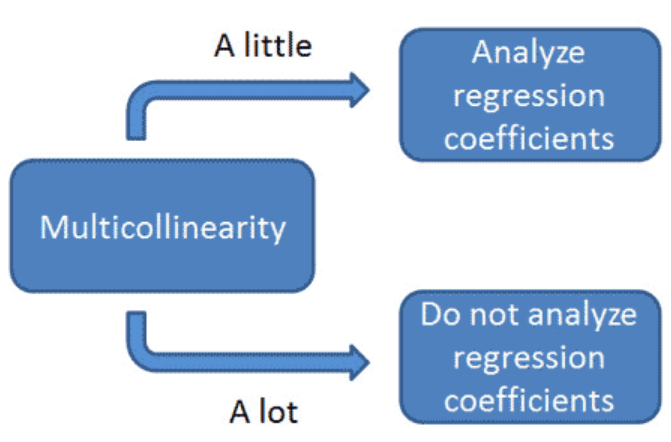
</div>

If the set of independent variables is characterized by a little bit of multicollinearity, the analysis of regression coefficients should be straightforward. If there is a lot of multicollinearity, the analysis will be hard to interpret and can be skipped.

**Note:** Multicollinearity makes it hard to assess the relative importance of independent variables, but it does not affect the usefulness of the regression equation for prediction. Even when multicollinearity is great, the least-squares regression equation can be highly predictive. So, if you are only interested in prediction, multicollinearity is not a problem.



### How to Measure Multicollinearity
<a id='2'></a>
There are two popular ways to measure multicollinearity: 

[1. compute a coefficient of multiple determination for each independent variable, or ](#1.1)

[2. compute a variance inflation factor for each independent variable.](#1.2)

## How to Deal with Multicollinearity
<a id = '4'></a>
If you only want to predict the value of a dependent variable, you may not have to worry about multicollinearity.

Multiple regression can produce a regression equation that will work for you, even when independent variables are highly correlated.

The problem arises when you want to assess the relative importance of an independent variable with a high R2k (or, equivalently, a high VIFk). 

In this situation, try the following:

- Redesign the study to avoid multicollinearity. If you are working on a true experiment, the experimenter controls treatment levels. Choose treatment levels to minimize or eliminate correlations between independent variables.
- Increase sample size. Other things being equal, a bigger sample means reduced sampling error. The increased precision may overcome potential problems from multicollinearity.
- Remove one or more of the highly-correlated independent variables. Then, define a new regression equation, based on the remaining variables. Because the removed variables were redundant, the new equation should be nearly as predictive as the old equation; and coefficients should be easier to interpret because multicolinearity is reduced.
- Define a new variable equal to a linear combination of the highly-correlated variables. Then, define a new regression equation, using the new variable in place of the old highly-correlated variables.

**Note**: Multicollinearity only affects variables that are highly correlated. 

If the variable you are interested in has a small R2j, statistical analysis of its regression coefficient will be reliable and informative. That analysis will be valid, even when other variables exhibit high multicollinearity.

#### Importing Libraries and Data

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.tools as tls
import plotly.figure_factory as ff
sns.set(style="whitegrid")

In [73]:
data=pd.read_csv('student.csv')
data

,Student,Marks,IQ,Study hrs.,GPA
0,1,100,125,30,3.9
1,2,95,104,40,2.6
2,3,92,110,25,2.7
3,4,90,105,20,3.0
4,5,85,100,20,2.4
5,6,80,100,20,2.2
6,7,78,95,15,2.1
7,8,75,95,10,2.1
8,9,72,85,0,1.5
9,10,65,90,5,1.8


### Data Description
- Student : Number of Students.  
- Marks : Study score obtained in particular test.
- IQ : Intelligence Quotient
- Study Hrs.: Weekly study time(in Hrs).
- GPA : Grade Point Average

In [74]:
data.shape

(50, 5)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
Student       50 non-null int64
Marks         50 non-null int64
IQ            50 non-null int64
Study hrs.    50 non-null int64
GPA           50 non-null float64
dtypes: float64(1), int64(4)
memory usage: 2.1 KB


In [76]:
print ("\nVariables : \n" ,data.columns.tolist())


Variables : 
 ['Student', 'Marks', 'IQ', 'Study hrs.', 'GPA']


### Context
#### Multiple Regression, Linear Models , Multicollinearity
- Measure multicollinearity, based on IQ, Study Hours.
- How multicollinearity affects your ability to interpret statistical tests on IQ and Study Hours.

### Attribute Information

**Dependent Variable (Y):** Marks (Study score obtained in particular test.)

**Independent Variables (X1,X2...):** Study hrs and IQ.

In [77]:
X1 = data['IQ']
X2 = data['Study hrs.']
Y = data['Marks'] 

##  Descriptive Statistics


In [78]:
data.describe()

,Student,Marks,IQ,Study hrs.,GPA
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,68.800000,82.980000,14.520000,2.052000
std,14.57738,23.005767,23.737931,9.992324,0.594615
min,1.00000,24.000000,40.000000,0.000000,1.200000
25%,13.25000,52.250000,61.500000,5.250000,1.600000
50%,25.50000,73.000000,89.500000,15.500000,1.900000
75%,37.75000,89.750000,100.000000,20.000000,2.600000
max,50.00000,100.000000,125.000000,40.000000,3.900000


In [79]:
hist_data = [data['IQ'], data['Study hrs.'],Y]

group_labels = ['IQ', 'Study Hrs','Marks']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=5,curve_type='normal',
                         show_hist = True, show_curve = True)
fig['layout'].update(title='Distribution Plot ')
fig.show()

In [80]:
data.drop(["Student"], axis = 1, inplace = True)

## [Coefficient of Multiple Determination](#1.1)
<a id= '3'></a>
<a id= '1.1'></a>

   The coefficient of multiple determination **R2** measures the proportion of variance in the dependent variable that is explained by all of the independent variables.

   If we ignore the dependent variable, we can compute a coefficient of multiple determination **R2k** for each of the k independent variables. We do this by regressing the kth independent variable on all of the other independent variables. That is, we treat **Xk** as the dependent variable and use the other independent variables to predict **Xk**.

   How do we interpret **R2k**? If **R2k** equals zero, variable **k** is not correlated with any other independent variable; and multicollinearity is not a problem for variable **k**. As a rule of thumb, most analysts feel that multicollinearity is a potential problem when **R2k** is greater than **0.75**; and, a serious problem when **R2k** is greater than __0.9__.

####  Correlation matrix between All Variables

In [81]:
fig = ff.create_annotated_heatmap(data.corr().values.tolist(),
                                   
                                  y=data.columns.tolist(),
                                  x=data.columns.tolist(), 
                                  colorscale='Inferno',
                                  showscale=True
                                 )
fig.show()

## Scatter Plot Matrix of ((X1, Y), (X2, Y), (X1, X2)...

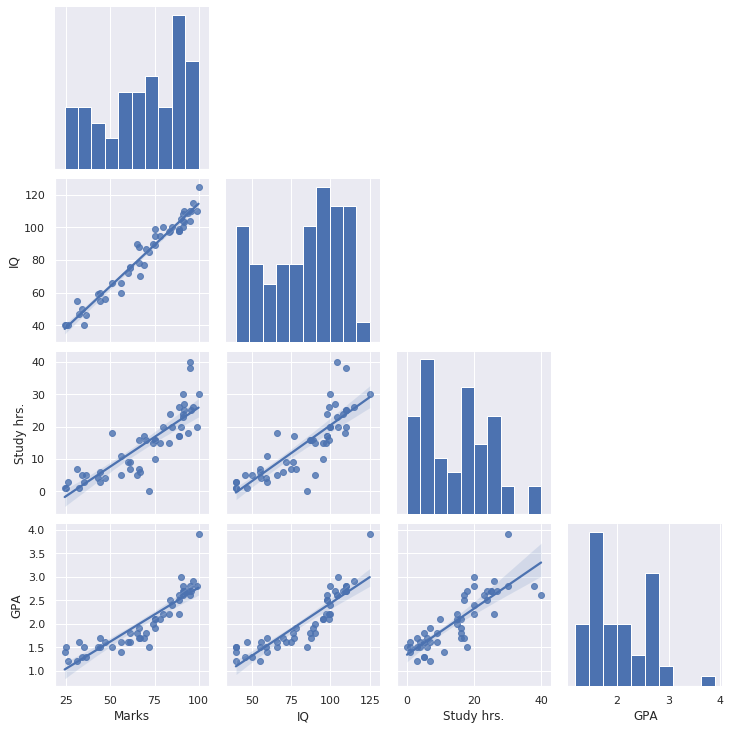

In [82]:
import seaborn as sns
sns.set()
sns.pairplot(data,size = 2.5, kind = "reg",corner=True)

### Correlation coefficient between (X1, Y), (X2, Y), (X1, X2)

In [83]:
data.drop(["GPA"], axis = 1, inplace = True)

In [84]:
fig = ff.create_annotated_heatmap(data.corr().values.tolist(),
                                   
                                  y=data.columns.tolist(),
                                  x=data.columns.tolist(), 
                                  colorscale='Viridis',
                                  showscale=True
                                 )
fig.show()

## [Variance Inflation Factor](#1.2)
<a id = '4'></a>
<a id = '1.2'></a>
The variance inflation factor is another way to express exactly the same information found in the coefficient of multiple correlation. A variance inflation factor is computed for each independent variable, using the following formula:

**VIFk = 1 / ( 1 - R2k )**

where **VIFk** is the variance inflation factor for variable **k**, and **R2k** is the coefficient of multiple determination for variable **k**.

In many statistical packages (e.g., SAS, SPSS, Minitab), the variance inflation factor is available as an optional regression output. In MiniTab, for example, the variance inflation factor can be displayed as part of the regression coefficient table.


In [85]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


t = data[['IQ', 'Study hrs.']]
t['Intercept'] = 1

# Compute and view VIF
vif = pd.DataFrame()
vif["Variables"] = t.columns
vif["VIF"] = [variance_inflation_factor(t.values, i) for i in range(t.shape[1])]

# View results using print
print(vif)

    Variables        VIF
0          IQ   3.107417
1  Study hrs.   3.107417
2   Intercept  19.913732


#### Ordinary Least Square Method 
**A Model Summary**
* Dep. Variable means variable that we want to predict and also called target variable, which is **Marks** 
* Model : OLS (Ordinary Least Square) , OLS is the common method to estimate the linear regression , **this method will find the line which minimises the Sum of the Squared Error** ( Lower Error = better explanatory power ) 

In [86]:
# y=b0+b1x1

x=sm.add_constant(X2)

results=sm.OLS(data['IQ'],x).fit()
#Contain Ordinary Least Square Regression 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     IQ   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     101.2
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           2.10e-13
Time:                        23:31:36   Log-Likelihood:                -200.45
No. Observations:                  50   AIC:                             404.9
Df Residuals:                      48   BIC:                             408.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.5735      3.418     15.969      0.000      47.702      61.445
Study hrs.     1.9564      0.195     10.058      0.000       1.565       2.347
==============================================================================
Omnibus:                        0.783   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.676   Jarque-Bera (JB):                0.803
Skew:                          -0.102   Prob(JB):                        0.669
Kurtosis:                       2.414   Cond. No.                         31.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


**Coefficient Table** <br>
54.5735	 is intercept <br>
1.9564 means  b0 


**y=b0+b1x1**<br>


**R-Squared** is measured how powerful the regression 
* R-Squared = Variability explained by the regression / Total variability of the dataset
* R-Squared using values ranging from 0 to 1 , if R-Squared = 0 means your regression explains NONE of the variability , if 1 means regression explains the ENTIRE variability.

**Our R-Squared has 0.595 , in other words Marks explained 60% of variability of weekly Study in hrs. , but since it is far away from 90% we may conclude that we are missing some important information .<br>
Other determinants must be consider such as Gender,GPA or maybe some other status.**

**std err ** shows the accuracy of prediction for each variable (Lower means better) <br>
Study hrs is a significant variable it has 0.009 in **P> | t |**


In [87]:
# data["e"] = data["Study hrs."]/30 , ##error bar =  ,error_y='e'

fig = px.scatter(data, x="Study hrs.", y="IQ",title='IQ VS Study in Hrs',trendline="ols" , color= "IQ")

fig.show()

Text(0, 0.5, 'Residuals')

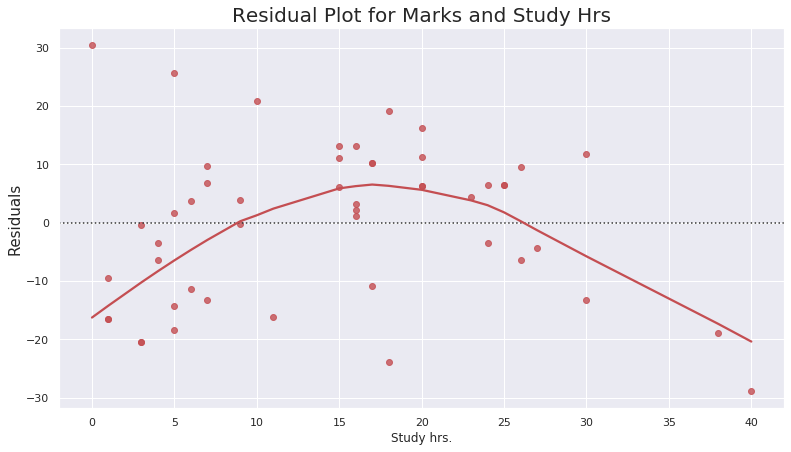

In [88]:
plt.figure(figsize=(13,7))
plt.title('Residual Plot for Marks and Study Hrs',size=20)
sns.residplot(X2, X1, lowess=True, color="r")
plt.ylabel('Residuals',size=15)

In [89]:
# y=b0+b1x1

x=sm.add_constant(X1)

results=sm.OLS(Y,x).fit()
#Contain Ordinary Least Square Regression 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Marks   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1048.
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           2.91e-34
Time:                        23:31:38   Log-Likelihood:                -149.02
No. Observations:                  50   AIC:                             302.0
Df Residuals:                      48   BIC:                             305.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.8398      2.525     -3.897      0.000     -14.916      -4.763
IQ             0.9477      0.029     32.372      0.000       0.889       1.007
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.412
Skew:                          -0.218   Prob(JB):                        0.814
Kurtosis:                       2.910   Cond. No.                         317.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
fig = px.scatter(data, x="IQ", y="Marks", title= 'MARKS vs IQ',trendline="ols",color="Marks")

fig.show()

Text(0, 0.5, 'Residuals')

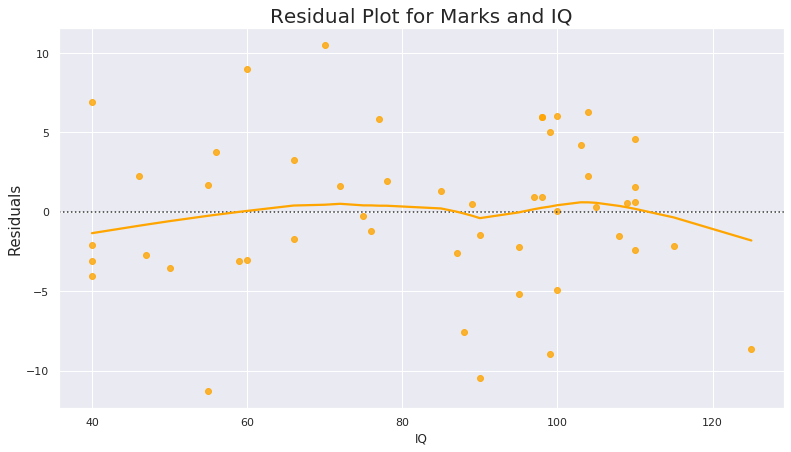

In [91]:
plt.figure(figsize=(13,7))
plt.title('Residual Plot for Marks and IQ',size=20)
sns.residplot(X1, Y, lowess=True, color="orange")
plt.ylabel('Residuals',size=15)

In [92]:
# y=b0+b1x1

x=sm.add_constant(X2)

results=sm.OLS(Y,x).fit()

#Contain Ordinary Least Square Regression 

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Marks   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     112.6
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           3.49e-14
Time:                        23:31:39   Log-Likelihood:                -197.03
No. Observations:                  50   AIC:                             398.1
Df Residuals:                      48   BIC:                             401.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.8069      3.192     12.786      0.000      34.390      47.224
Study hrs.     1.9279      0.182     10.613      0.000       1.563       2.293
==============================================================================
Omnibus:                        0.200   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.905   Jarque-Bera (JB):                0.376
Skew:                          -0.111   Prob(JB):                        0.828
Kurtosis:                       2.638   Cond. No.                         31.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
fig = px.scatter(data, x="Study hrs.", y="Marks",title='MARKS vs Study Hrs  ', trendline="ols",color="Study hrs.")

fig.show()

Text(0, 0.5, 'Residuals')

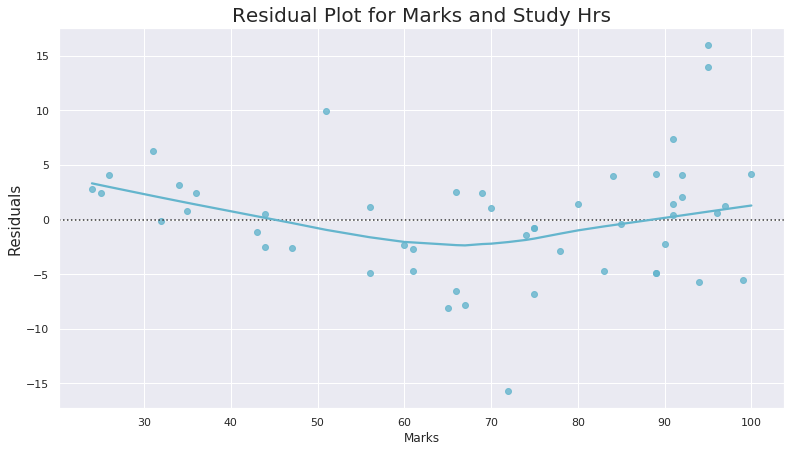

In [94]:
plt.figure(figsize=(13,7))
plt.title('Residual Plot for Marks and Study Hrs',size=20)
sns.residplot(Y, X2, lowess=True, color="c")
plt.ylabel('Residuals',size=15)

In [95]:
# regression
# data['bestfit'] = sm.OLS(Y,sm.add_constant(X1)).fit().fittedvalues

# plotly figure setup
fig=go.Figure()
#********************#


fig.add_trace(go.Scatter(name='Marks vs IQ', x=X1, y=Y, mode='markers'))

data['bestfit'] = sm.OLS(Y,sm.add_constant(X1)).fit().fittedvalues

fig.add_trace(go.Scatter(name='line of best fit', x=X1, y=data['bestfit'], mode='lines'))

#********************#



fig.add_trace(go.Scatter(name='MARKS vs Study hrs', x=X2, y=Y, mode='markers'))

data['bestfit'] = sm.OLS(Y,sm.add_constant(X2)).fit().fittedvalues

fig.add_trace(go.Scatter(name='line of best fit', x=X2, y=data['bestfit'], mode='lines'))

#********************#



# plotly figure layout
fig.update_layout(xaxis_title = 'Independent Variables', yaxis_title = 'MARKS',title='MARKS VS IQ and Study hrs')

fig.show()

    Multicollinearity makes it hard to assess the relative importance of independent variables, but it does not affect the usefulness of the regression equation for prediction. Even when multicollinearity is great, the least-squares regression equation can be highly predictive. So, if you are only interested in prediction, multicollinearity is not a problem.

### Coefficient Table
-6.5706 means constant  <br>
0.8681 means b0 <br>
0.2295 means b1 <br>

**y = b0 + b1x1 + b2x2** <br>

In [96]:
# y=b0+b1x1
X = data[['IQ','Study hrs.']]
x=sm.add_constant(X)

results=sm.OLS(Y,x).fit()

#Contain Ordinary Least Square Regression 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Marks   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     555.3
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           2.00e-33
Time:                        23:31:42   Log-Likelihood:                -147.13
No. Observations:                  50   AIC:                             300.3
Df Residuals:                      47   BIC:                             306.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5706      2.987     -2.200      0.033     -12.580      -0.561
IQ             0.8681      0.050     17.289      0.000       0.767       0.969
Study hrs.     0.2295      0.119      1.924      0.060      -0.010       0.469
==============================================================================
Omnibus:                        0.483   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.785   Jarque-Bera (JB):                0.189
Skew:                          -0.148   Prob(JB):                        0.910
Kurtosis:                       3.053   Cond. No.                         392.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion :** R- Squared measure goodness of fit , the more factore you include in regression the higher the R Squared 

**F-statistic :**  is important for regression as it give us some important insights (Higher mean Better), **the lower the F-Statistic the closer to an non-significant model** .

## VIF

The interpretation of the variance inflation factor mirrors the interpretation of the coefficient of multiple determination. If **VIFk** = 1, variable **k** is not correlated with any other independent variable. 
    
   As a rule of thumb, multicollinearity is a potential problem when **VIFk** is greater than **4**; and, a serious problem when it is greater than **10**. The output above shows a **VIF** of **2.466**, which indicates some multicollinearity but not enough to worry about.

Bottom line: If **R2k** is greater than **0.9** or **VIFk** is greater than **10**, it is likely that regression coefficients are poorly estimated. And significance tests on those coefficients may be misleading.

In [97]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


t = data[['IQ', 'Study hrs.']]
t['Intercept'] = 1

# Compute and view VIF
vif = pd.DataFrame()
vif["Variables"] = t.columns
vif["VIF"] = [variance_inflation_factor(t.values, i) for i in range(t.shape[1])]

# View results using print
print(vif)

    Variables        VIF
0          IQ   3.107417
1  Study hrs.   3.107417
2   Intercept  19.913732


## Multicollinearity only affects variables that are highly correlated. 
    
    If the variable you are interested in has a small R2j, statistical analysis of its regression coefficient   will be reliable and informative. 
    
    That analysis will be valid, even when other variables exhibit high multicollinearity.

                        _________________________________________________